# Simple Linear Regression

$y = \beta_0 + \beta_1 x + \varepsilon$

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
data_url = 'https://raw.githubusercontent.com/cmdlinetips/data/master/cars.tsv'
df = pd.read_csv(data_url, sep="\t")

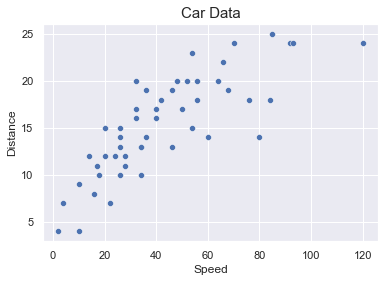

In [13]:
sns.set()
sns.scatterplot(x=df.dist, y=df.speed, data=df)
plt.title(f'Car Data', fontsize=15)
plt.xlabel('Speed')
plt.ylabel('Distance')
plt.show()

In [14]:
X_dat = df.dist.values
y = df.speed.values
X = np.vstack((np.ones(len(X_dat)),X_dat)).T

Given the data inputs $X$ and the responses $Y$, we can find the $\hat{\beta} = (X^\top X)^{-1}X^\top y$

And thus, the predictions are $\hat{y}=X \hat{\beta}$

In [15]:
hat_β = np.linalg.inv((X.T @ X)) @ X.T @ y
hat_y = X @ hat_β
rmse = round((sum((y - hat_y)**2))**(1/2),2)

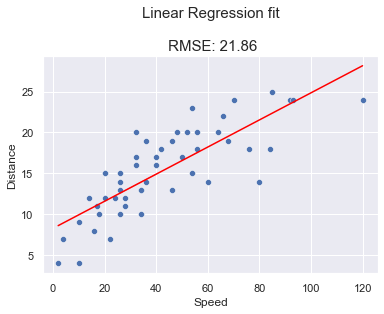

In [16]:
sns.scatterplot(x=X_dat, y=y)
sns.lineplot(x=X_dat, y=hat_y, color='red')
plt.title(f'Linear Regression fit\n\n RMSE: {rmse}', fontsize=15)
plt.xlabel('Speed')
plt.ylabel('Distance')
plt.show()

# Simple Polynomial Regression

$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \varepsilon$

In [17]:
def create_phi_matrix(data, degrees):
    copy = data.reshape((len(data),1)).copy()
    polynomials = np.ones((len(data),1))
    for i in range(2, degrees+1):
        polynomials = np.append(polynomials, copy**i, axis=1)
        df = np.append(data.reshape((len(data),1)), polynomials[:,1:], axis=1)
    return df

In [18]:
polynomial_degree = 3
Φ_mat = create_phi_matrix(data=X_dat, degrees=polynomial_degree)
ones = np.ones((len(Φ_mat),1))
Φ = np.append(ones, Φ_mat, axis=1)

In [19]:
hat_β = np.linalg.inv((Φ.T @ Φ)) @ Φ.T @ y
hat_y = Φ @ hat_β
rmse = round((sum((y - hat_y)**2))**(1/2),2)

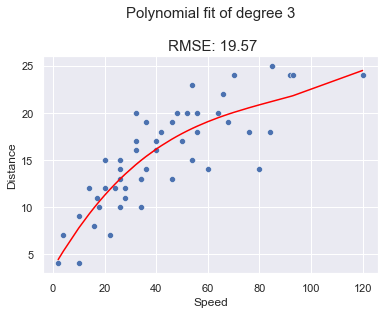

In [20]:
sns.scatterplot(x=X_dat, y=y)
sns.lineplot(x=X_dat, y=hat_y, color='red')
plt.title(f'Polynomial fit of degree {polynomial_degree}\n\n RMSE: {rmse}', fontsize=15)
plt.xlabel('Speed')
plt.ylabel('Distance')
plt.show()